In [1]:
import json



import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

from scipy import stats

In [2]:
#pip install xgboost

In [3]:
#conda install -c conda-forge xgboost

In [4]:
#import data from file
with open('/Users/lisajin/Documents/Smnology/pmdata/p03/fitbit/sleep.json') as file:
    data = json.load(file)

In [5]:
df = pd.DataFrame(data)
df.head()

,logId,dateOfSleep,startTime,endTime,duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,timeInBed,efficiency,type,infoCode,levels,mainSleep
0,24472351655,2019-11-01,2019-11-01 01:48:00,2019-11-01T04:03:00.000,8100000,0,126,9,0,135,93,classic,2,"{'summary': {'restless': {'count': 5, 'minutes...",True
1,24490223982,2019-11-02,2019-11-02 00:36:00,2019-11-02T07:40:00.000,25440000,0,368,56,4,424,89,stages,0,"{'summary': {'deep': {'count': 3, 'minutes': 6...",True
2,24533606348,2019-11-06,2019-11-05 23:18:00,2019-11-06T07:29:30.000,29460000,0,443,48,0,491,96,stages,0,"{'summary': {'deep': {'count': 6, 'minutes': 1...",True
3,24559972015,2019-11-07,2019-11-06 23:32:30,2019-11-07T07:26:00.000,28380000,0,415,58,0,473,95,stages,0,"{'summary': {'deep': {'count': 5, 'minutes': 6...",True
4,24559972016,2019-11-08,2019-11-08 00:06:30,2019-11-08T07:25:00.000,26280000,0,395,43,0,438,95,stages,0,"{'summary': {'deep': {'count': 5, 'minutes': 8...",True


In [10]:
data2 = pd.read_csv("/Users/lisajin/Documents/Smnology/pmdata/p03/fitbit/sleep_score.csv",encoding = "ISO-8859-1")

In [11]:
sleep_data = pd.merge(df, data2, 
                   on='logId', 
                   how='inner')
  
# displaying result
#print(output1)


headers = np.array(sleep_data.columns)  # get headers
values = sleep_data.values  # numpy array of values
matrix = np.concatenate([[headers], values])  # append to the final matrix


In [12]:
sleep_data

,logId,dateOfSleep,startTime,endTime,duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,timeInBed,...,levels,mainSleep,timestamp,overall_score,composition_score,revitalization_score,duration_score,deep_sleep_in_minutes,resting_heart_rate,restlessness
0,24490223982,2019-11-02,2019-11-02 00:36:00,2019-11-02T07:40:00.000,25440000,0,368,56,4,424,...,"{'summary': {'deep': {'count': 3, 'minutes': 6...",True,2019-11-02T07:40:00Z,65,17,13,35,59,60,0.087740
1,24533606348,2019-11-06,2019-11-05 23:18:00,2019-11-06T07:29:30.000,29460000,0,443,48,0,491,...,"{'summary': {'deep': {'count': 6, 'minutes': 1...",True,2019-11-06T07:29:30Z,86,22,22,42,107,61,0.067358
2,24559972015,2019-11-07,2019-11-06 23:32:30,2019-11-07T07:26:00.000,28380000,0,415,58,0,473,...,"{'summary': {'deep': {'count': 5, 'minutes': 6...",True,2019-11-07T07:26:00Z,79,19,22,38,67,59,0.089757
3,24559972016,2019-11-08,2019-11-08 00:06:30,2019-11-08T07:25:00.000,26280000,0,395,43,0,438,...,"{'summary': {'deep': {'count': 5, 'minutes': 8...",True,2019-11-08T07:25:00Z,80,20,21,39,80,58,0.071429
4,24604252564,2019-11-12,2019-11-12 00:16:00,2019-11-12T04:00:30.000,13440000,0,194,30,0,224,...,"{'summary': {'deep': {'count': 1, 'minutes': 2...",True,2019-11-12T04:00:30Z,70,19,22,29,22,57,0.057831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,26509000923,2020-03-23,2020-03-23 01:05:30,2020-03-23T06:51:00.000,20700000,0,310,35,0,345,...,"{'summary': {'deep': {'count': 4, 'minutes': 2...",True,2020-03-23T06:51:00Z,67,18,16,33,26,53,0.059334
73,26509000924,2020-03-24,2020-03-24 00:20:00,2020-03-24T07:31:30.000,25860000,0,392,39,0,431,...,"{'summary': {'deep': {'count': 4, 'minutes': 7...",True,2020-03-24T07:31:30Z,79,21,19,39,69,54,0.055879
74,26509000925,2020-03-26,2020-03-26 01:34:30,2020-03-26T08:03:30.000,23340000,0,350,39,1,389,...,"{'summary': {'deep': {'count': 4, 'minutes': 9...",True,2020-03-26T08:03:30Z,72,20,16,36,95,55,0.061617
75,26516780913,2020-03-29,2020-03-29 01:06:00,2020-03-29T08:25:30.000,26340000,0,344,35,0,439,...,"{'summary': {'deep': {'count': 3, 'minutes': 6...",True,2020-03-29T08:25:30Z,77,20,21,36,68,59,0.041475


In [13]:
#sleep_data=sleep_data.iloc[:,5:-1]
sleep_data_x=sleep_data.drop(['logId','type','dateOfSleep','startTime','endTime','duration', 'infoCode','levels','mainSleep','timestamp','overall_score','composition_score','revitalization_score','duration_score'], axis=1)
#df.drop([2,3], axis=0, inplace=True)

In [14]:
sleep_data_x

,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,timeInBed,efficiency,deep_sleep_in_minutes,resting_heart_rate,restlessness
0,0,368,56,4,424,89,59,60,0.087740
1,0,443,48,0,491,96,107,61,0.067358
2,0,415,58,0,473,95,67,59,0.089757
3,0,395,43,0,438,95,80,58,0.071429
4,0,194,30,0,224,92,22,57,0.057831
...,...,...,...,...,...,...,...,...,...
72,0,310,35,0,345,93,26,53,0.059334
73,0,392,39,0,431,93,69,54,0.055879
74,0,350,39,1,389,93,95,55,0.061617
75,0,344,35,0,439,97,68,59,0.041475


In [15]:
# Perform first split
X_train_temp, X_test, y_train_temp, y_test = train_test_split(sleep_data_x.iloc[:,:-1], 
                                                              sleep_data['overall_score'], 
                                                              test_size=0.2, 
                                                              random_state=42)

# Perform the second split
X_train, X_valid, y_train, y_valid = train_test_split(X_train_temp, y_train_temp, 
                                                      test_size=0.25, random_state=42)

In [16]:
# Create the scaler with object range of 0-1
scaler = MinMaxScaler()

# Fit and transform using the training data
scaler.fit_transform(X_train)

# Transform the validation and test features
scaler.transform(X_valid)
scaler.transform(X_test)

array([[ 0.        ,  0.05847953,  0.06818182,  0.        ,  0.03412073,
         0.38461538, -0.03883495,  0.5       ],
       [ 0.        ,  0.69590643,  0.14772727,  0.125     ,  0.62467192,
         0.84615385,  0.27184466,  0.5       ],
       [ 0.        ,  0.26023392,  0.21590909,  0.375     ,  0.24934383,
         0.69230769,  0.51456311,  0.75      ],
       [ 0.        ,  0.56725146,  0.36363636,  0.5       ,  0.55905512,
         0.15384615,  0.32038835,  0.875     ],
       [ 0.        ,  0.39473684,  0.375     ,  0.        ,  0.40682415,
         0.61538462,  0.31067961,  0.25      ],
       [ 0.        ,  1.00584795,  0.65909091,  0.        ,  1.02099738,
         0.61538462,  0.4368932 ,  0.625     ],
       [ 0.        ,  0.34210526,  0.23863636,  0.        ,  0.32808399,
         0.61538462,  0.18446602,  0.375     ],
       [ 0.        ,  0.56432749,  0.52272727,  0.        ,  0.59317585,
         0.69230769,  0.26213592,  0.25      ],
       [ 0.        ,  0.61988304

# Linear Rgression, Tree decision model

In [17]:
def scoring(model, test_features, test_labels):
    predictions = model.predict(test_features)
    mae = mean_absolute_error(test_labels, predictions)
    mse = mean_squared_error(test_labels, predictions)
    r2 = r2_score(test_labels, predictions)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Mean Absolute Error: {:0.4f}.'.format(mae))
    print('Mean Squared Error: {:0.4f}.'.format(mse))
    print('R^2 Score = {:0.4f}.'.format(r2))
    print('Accuracy = {:0.2f}%.'.format(accuracy))

In [18]:
# Create list of median predictions that has the same length as y_valid
baseline_y = [y_train.median()] * len(y_valid)

# Compute the relevant scores
base_predictions = baseline_y
base_mae = mean_absolute_error(y_valid, base_predictions)
base_mse = mean_squared_error(y_valid, base_predictions)
base_r2 = r2_score(y_valid, base_predictions)
base_errors = abs(base_predictions - y_valid)
base_mape = 100 * np.mean(base_errors / y_valid)
base_accuracy = 100 - base_mape
print('Model Performance')
print('Mean Absolute Error: {:0.4f}.'.format(base_mae))
print('Mean Squared Error: {:0.4f}.'.format(base_mse))
print('R^2 Score = {:0.4f}.'.format(base_r2))
print('Accuracy = {:0.2f}%.'.format(base_accuracy))

Model Performance
Mean Absolute Error: 4.3125.
Mean Squared Error: 33.1875.
R^2 Score = -0.3129.
Accuracy = 93.92%.


Text(0, 0.5, 'Coefficients')

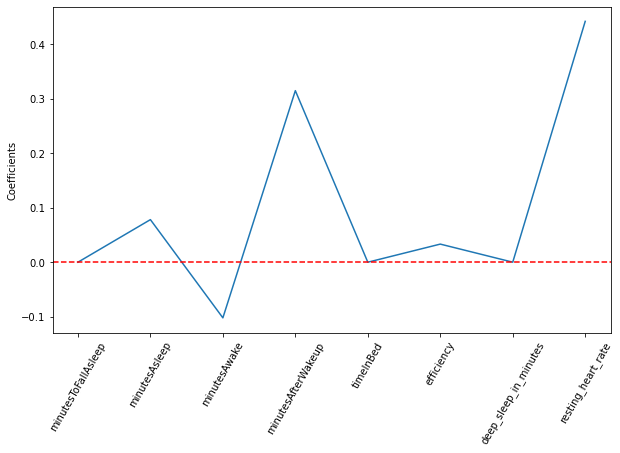

In [19]:
# Create the model
lasso = linear_model.Lasso(alpha=0.1)

# Fit the model to the training data
lasso.fit(X_train, y_train)

# Extract the coefficients
lasso_coef = lasso.coef_

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.plot(range(len(X_train.columns)), lasso_coef)
plt.xticks(range(len(X_train.columns)), X_train.columns, rotation=60)
plt.axhline(0.0, linestyle='--', color='r')
plt.ylabel('Coefficients')

From the above feature selection, we can see that we can decrease some of the feature, we are going to delete mins to fall asleep and time in bed

In [20]:
# Create a list of the columns to drop
cols_to_drop = ['timeInBed', 'minutesAfterWakeup','minutesToFallAsleep']

# Drop these columns from training, validation and test data
X_train_temp.drop(columns=cols_to_drop, inplace=True)
X_train.drop(columns=cols_to_drop, inplace=True)
X_valid.drop(columns=cols_to_drop, inplace=True)
X_test.drop(columns=cols_to_drop, inplace=True)

/Users/lisajin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# Linear Regression Model

In [21]:
# Create regressor
regressor = LinearRegression()

# Fit MLR model to training data
mlr = regressor.fit(X_train, y_train)

# Evaluate the performance
scoring(mlr, X_valid, y_valid)

Model Performance
Mean Absolute Error: 3.2149.
Mean Squared Error: 16.1459.
R^2 Score = 0.3613.
Accuracy = 95.58%.


In [22]:
coef=regressor.coef_
print(coef)

[ 0.07770049 -0.10282551  0.06365563  0.00094233  0.42726487]


In [23]:
print(list(zip(regressor.coef_, X_test)))

[(0.07770048949793885, 'minutesAsleep'), (-0.10282550895422579, 'minutesAwake'), (0.06365563210809597, 'efficiency'), (0.0009423250240607085, 'deep_sleep_in_minutes'), (0.4272648688907398, 'resting_heart_rate')]


# Random Forest Model

In [24]:
# Create regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Fit RF model to training data
rf = rf_regressor.fit(X_train, y_train)

# Evaluate the performance
scoring(rf, X_valid, y_valid)

Model Performance
Mean Absolute Error: 2.5800.
Mean Squared Error: 11.6714.
R^2 Score = 0.5383.
Accuracy = 96.44%.


In [25]:
rf.score(X_valid, y_valid)

0.5382653685674552

In [26]:
scoring(rf, X_test, y_test)

Model Performance
Mean Absolute Error: 3.2706.
Mean Squared Error: 19.1683.
R^2 Score = 0.7066.
Accuracy = 95.09%.


In [27]:
list(zip(X_valid, rf.feature_importances_))

[('minutesAsleep', 0.6631612727706389),
 ('minutesAwake', 0.1385804077222093),
 ('efficiency', 0.0458829647112378),
 ('deep_sleep_in_minutes', 0.09132086244222021),
 ('resting_heart_rate', 0.06105449235369408)]

# Extreme Gradient Boosting

In [28]:
# Create regressor
xgb_regressor = XGBRegressor.XGBRegressor(random_state=42)

# Fit model to training data
xgb = xgb_regressor.fit(X_train, y_train)

# Evaluate the performance
scoring(xgb, X_valid, y_valid)

Model Performance
Mean Absolute Error: 2.9434.
Mean Squared Error: 13.8388.
R^2 Score = 0.4525.
Accuracy = 95.97%.


In [29]:
scoring(xgb, X_test, y_test)

Model Performance
Mean Absolute Error: 3.4236.
Mean Squared Error: 19.6508.
R^2 Score = 0.6993.
Accuracy = 94.94%.


In [30]:
list(zip(X_valid, xgb.feature_importances_))

[('minutesAsleep', 0.42166275),
 ('minutesAwake', 0.23565121),
 ('efficiency', 0.1708202),
 ('deep_sleep_in_minutes', 0.14069524),
 ('resting_heart_rate', 0.03117053)]

# KneighborClassifier Model for Classification, not suitable yet. 

Text(0, 0.5, 'Error Rate')

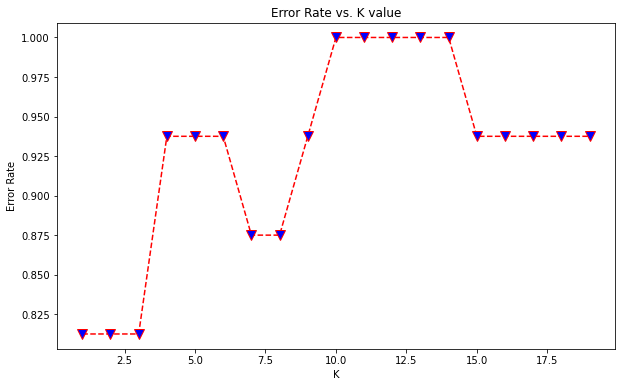

In [31]:
#this one is used for classification problems, think more if we should use this model. maybe sleep apnea detection

from sklearn.neighbors import KNeighborsClassifier

error_rate =[]
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate, color ='red',linestyle='dashed',marker='v',
        markerfacecolor = 'blue', markersize=10)
plt.title('Error Rate vs. K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [33]:
knn = KNeighborsClassifier(n_neighbors=2) # why 5 is because of Elbow method
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [34]:
print('test accuracy:', knn.score(X_test,y_test))

test accuracy: 0.1875


In [35]:
coef=regressor.coef_
print(coef)

[ 0.07770049 -0.10282551  0.06365563  0.00094233  0.42726487]


# Logistic Regression, NA, used for classification

In [36]:
#logistic regression model? need to think about it


from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
print('test accuracy:', logmodel.score(X_test,y_test))

test accuracy: 0.0


/Users/lisajin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
print(list(zip(logmodel.coef_, X_test)))

[(array([-0.25437889,  0.18062172,  0.46159584,  0.04258023,  0.36639822]), 'minutesAsleep'), (array([-0.13760811,  0.17494839,  0.31212896, -0.02500556,  0.25337624]), 'minutesAwake'), (array([-0.15164069,  0.01362278,  0.42380105, -0.02309745,  0.22191127]), 'efficiency'), (array([-0.06938604,  0.35645905,  0.19120794, -0.21439493,  0.06909824]), 'deep_sleep_in_minutes'), (array([ 0.03434781, -0.07400766, -0.13507675,  0.13818426, -0.03494542]), 'resting_heart_rate')]


# Validation

In [38]:
# Define a function that compares the CV perfromance of a set of predetrmined models 
def cv_comparison(models, X, y, cv):
    # Initiate a DataFrame for the averages and a list for all measures
    cv_accuracies = pd.DataFrame()
    maes = []
    mses = []
    r2s = []
    accs = []
    # Loop through the models, run a CV, add the average scores to the DataFrame and the scores of 
    # all CVs to the list
    for model in models:
        mae = -np.round(cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv), 4)
        maes.append(mae)
        mae_avg = round(mae.mean(), 4)
        mse = -np.round(cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv), 4)
        mses.append(mse)
        mse_avg = round(mse.mean(), 4)
        r2 = np.round(cross_val_score(model, X, y, scoring='r2', cv=cv), 4)
        r2s.append(r2)
        r2_avg = round(r2.mean(), 4)
        acc = np.round((100 - (100 * (mae * len(X))) / sum(y)), 5)
        accs.append(acc)
        acc_avg = round(acc.mean(), 4)
        cv_accuracies[str(model)] = [mae_avg, mse_avg, r2_avg, acc_avg]
    cv_accuracies.index = ['Mean Absolute Error', 'Mean Squared Error', 'R^2', 'Accuracy']
    return cv_accuracies, maes, mses, r2s, accs

In [51]:
# Create the models to be tested
mlr_reg = LinearRegression()
rf_reg = RandomForestRegressor(random_state=42)
xgb_reg = xgb_regressor = XGBRegressor.XGBRegressor(random_state=42)

# Put the models in a list to be used for Cross-Validation
models = [mlr_reg, rf_reg, xgb_reg]

# Run the Cross-Validation comparison with the models used in this analysis
comp, maes, mses, r2s, accs = cv_comparison(models, X_train_temp, y_train_temp, 4)
comp.columns=['Linear Regression', 'Random Forest', 'Extreme Gradient Boosting']

In [52]:
comp

,Linear Regression,Random Forest,Extreme Gradient Boosting
Mean Absolute Error,3.3664,3.2092,3.2273
Mean Squared Error,17.4446,17.2879,18.8736
R^2,0.3566,0.3824,0.3141
Accuracy,95.5820,95.7882,95.7645


In [53]:
# Create DataFrame for all R^2s
r2_comp = pd.DataFrame(r2s, index=comp.columns, columns=['1st Fold', '2nd Fold', '3rd Fold', 
                                                         '4th Fold'])

# Add a column for the averages
r2_comp['Average'] = np.round(r2_comp.mean(axis=1),4)
comp.rows=['Linear Regression', 'Random Forest', 'Extreme Gradient Boosting']

<ipython-input-53-a67d3a47616e>:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  comp.rows=['Linear Regression', 'Random Forest', 'Extreme Gradient Boosting']


In [54]:
r2_comp

,1st Fold,2nd Fold,3rd Fold,4th Fold,Average
Linear Regression,0.3418,0.0905,0.7078,0.2863,0.3566
Random Forest,0.4874,0.6135,0.6583,-0.2294,0.3824
Extreme Gradient Boosting,0.4822,0.5136,0.6202,-0.3595,0.3141


In [43]:
# Number of trees in Random Forest
rf_n_estimators = [int(x) for x in np.linspace(200, 1000, 5)]
rf_n_estimators.append(1500)
rf_n_estimators.append(2000)

# Maximum number of levels in tree
rf_max_depth = [int(x) for x in np.linspace(5, 55, 11)]
# Add the default as a possible value
rf_max_depth.append(None)

# Number of features to consider at every split
rf_max_features = ['auto', 'sqrt', 'log2']

# Criterion to split on
rf_criterion = ['mse', 'mae']

# Minimum number of samples required to split a node
rf_min_samples_split = [int(x) for x in np.linspace(2, 10, 9)]

# Minimum decrease in impurity required for split to happen
rf_min_impurity_decrease = [0.0, 0.05, 0.1]

# Method of selecting samples for training each tree
rf_bootstrap = [True, False]

# Create the grid
rf_grid = {'n_estimators': rf_n_estimators,
               'max_depth': rf_max_depth,
               'max_features': rf_max_features,
               'criterion': rf_criterion,
               'min_samples_split': rf_min_samples_split,
               'min_impurity_decrease': rf_min_impurity_decrease,
               'bootstrap': rf_bootstrap}


In [44]:
# Create the model to be tuned
rf_base = RandomForestRegressor()

# Create the random search Random Forest
rf_random = RandomizedSearchCV(estimator = rf_base, param_distributions = rf_grid, 
                               n_iter = 200, cv = 3, verbose = 2, random_state = 42, 
                               n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train_temp, y_train_temp)

# View the best parameters from the random search
rf_random.best_params_

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:   45.7s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  1.3min finished


{'n_estimators': 1500,
 'min_samples_split': 4,
 'min_impurity_decrease': 0.1,
 'max_features': 'log2',
 'max_depth': 15,
 'criterion': 'mse',
 'bootstrap': False}

In [45]:
# Number of trees to be used
xgb_n_estimators = [int(x) for x in np.linspace(200, 2000, 10)]

# Maximum number of levels in tree
xgb_max_depth = [int(x) for x in np.linspace(2, 20, 10)]

# Minimum number of instaces needed in each node
xgb_min_child_weight = [int(x) for x in np.linspace(1, 10, 10)]

# Tree construction algorithm used in XGBoost
xgb_tree_method = ['auto', 'exact', 'approx', 'hist', 'gpu_hist']

# Learning rate
xgb_eta = [x for x in np.linspace(0.1, 0.6, 6)]

# Minimum loss reduction required to make further partition
xgb_gamma = [int(x) for x in np.linspace(0, 0.5, 6)]

# Learning objective used
xgb_objective = ['reg:squarederror', 'reg:squaredlogerror']

# Create the grid
xgb_grid = {'n_estimators': xgb_n_estimators,
            'max_depth': xgb_max_depth,
            'min_child_weight': xgb_min_child_weight,
            'tree_method': xgb_tree_method,
            'eta': xgb_eta,
            'gamma': xgb_gamma,
            'objective': xgb_objective}

In [46]:
# Create the model to be tuned
xgb_base = XGBRegressor.XGBRegressor()

# Create the random search Random Forest
xgb_random = RandomizedSearchCV(estimator = xgb_base, param_distributions = xgb_grid, 
                                n_iter = 200, cv = 3, verbose = 2, 
                                random_state = 420, n_jobs = -1)

# Fit the random search model
xgb_random.fit(X_train_temp, y_train_temp)

# Get the optimal parameters
xgb_random.best_params_

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  6.0min finished


{'tree_method': 'approx',
 'objective': 'reg:squarederror',
 'n_estimators': 1200,
 'min_child_weight': 3,
 'max_depth': 20,
 'gamma': 0,
 'eta': 0.5}

In [47]:
# Create the final Multiple Linear Regression
mlr_final = LinearRegression()




# Create the final Random Forest
rf_final = RandomForestRegressor(n_estimators = 1500,
                                 min_samples_split = 4,
                                 min_impurity_decrease = 0.1,
                                 max_features = 'log2',
                                 max_depth = 15,
                                 criterion = 'mse',
                                 bootstrap = False,
                                 random_state = 42)


# Create the fnal Extreme Gradient Booster
xgb_final = XGBRegressor.XGBRegressor(tree_method = 'approx',
                         objective = 'reg:squarederror',
                         n_estimators = 1200,
                         min_child_weight = 3,
                         max_depth = 20,
                         gamma = 0,
                         eta = 0.5,
                         random_state = 42)

# Train the models using 80% of the original data
mlr_final.fit(X_train_temp, y_train_temp)
rf_final.fit(X_train_temp, y_train_temp)
xgb_final.fit(X_train_temp, y_train_temp)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.5, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.5, max_delta_step=0, max_depth=20,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=1200, n_jobs=16, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='approx', validate_parameters=1, verbosity=None)

In [48]:
# Define a function that compares all final models
def final_comparison(models, test_features, test_labels):
    scores = pd.DataFrame()
    for model in models:
        predictions = model.predict(test_features)
        mae = round(mean_absolute_error(test_labels, predictions), 4)
        mse = round(mean_squared_error(test_labels, predictions), 4)
        r2 = round(r2_score(test_labels, predictions), 4)
        errors = abs(predictions - test_labels)
        mape = 100 * np.mean(errors / test_labels)
        accuracy = round(100 - mape, 4)
        scores[str(model)] = [mae, mse, r2, accuracy]
    scores.index = ['Mean Absolute Error', 'Mean Squared Error', 'R^2', 'Accuracy']
    return scores

In [49]:
# Call the comparison function with the three final models
final_scores = final_comparison([mlr_final, rf_final, xgb_final], X_test, y_test)

# Adjust the column headers
final_scores.columns  = ['Linear Regression', 'Random Forest', 'Extreme Gradient Boosting']

In [64]:
final_scores

,Linear Regression,Random Forest,Extreme Gradient Boosting
Mean Absolute Error,3.5534,3.5808,3.9629
Mean Squared Error,21.5618,22.7385,24.5243
R^2,0.6700,0.6520,0.6247
Accuracy,94.6884,94.6467,94.2521


# Support Vector Model

In [65]:
# First SVM model
from sklearn.svm import SVC
svm=SVC(random_state=101)
svm.fit(X_train_temp, y_train_temp)
print('train accuracy:', svm.score(X_train_temp, y_train_temp))
print('test accuracy:', svm.score(X_test,y_test))

train accuracy: 0.21311475409836064
test accuracy: 0.0625
